<a href="https://colab.research.google.com/github/jvrupp/Curso_UESC_Pandas_2022/blob/main/diamantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
diamonds= pd.read_csv(r'/content/gdrive/MyDrive/diamonds.csv')
diamonds.head()
diamonds['ones']=1

In [ ]:
from sklearn.cluster import KMeans

plt.figure(figsize=(15,9))
WCSS=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(diamonds.iloc[:,[7,11]])
  WCSS.append(kmeans.inertia_)
  


WCSS=pd.Series(WCSS)


<Figure size 1080x648 with 0 Axes>

In [ ]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(diamonds.iloc[:,[7,11]])



KMeans(n_clusters=5)

In [ ]:
diamonds['grupos']=pd.Series(kmeans.labels_)


In [ ]:
diamonds[diamonds['grupos']==1]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,ones,grupos
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,1
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53635,53636,0.30,Ideal,I,VVS1,62.1,56.0,552,4.30,4.33,2.68,1,1
53636,53637,0.30,Ideal,D,SI1,61.6,57.0,552,4.28,4.32,2.65,1,1
53637,53638,0.30,Very Good,D,SI1,62.5,57.0,552,4.26,4.28,2.67,1,1
53638,53639,0.30,Ideal,D,SI1,61.0,57.0,552,4.29,4.33,2.63,1,1


In [ ]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,ones,grupos
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,1
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
diamonds= pd.read_csv(r'/content/gdrive/MyDrive/diamonds.csv')
##################################tratando as variaveis categoricas
cat_cut=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cat_color=['D','E','F','G','H','I','J']
cat_clarity='I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF'.split(',')
diamonds.drop(columns=['Unnamed: 0'],inplace=True)
diamonds['color']=diamonds['color'].replace(cat_color,[0,1,2,3,4,5,6])
diamonds['cut']=diamonds['cut'].replace(cat_cut,[0,1,2,3,4])
diamonds['clarity']=diamonds['clarity'].replace(cat_clarity,[0,1,2,3,4,5,6,7])
preco = diamonds['price']
diamonds.drop(columns=['price'],inplace=True)
diamonds


,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,1,1,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,6.15,6.12,3.74


In [ ]:
from sklearn.preprocessing import StandardScaler


for i in range(0,9):
    scaler=StandardScaler()
    diamonds.iloc[:,[i]]=scaler.fit_transform(diamonds.iloc[:,[i]])

##########################################################################
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5)
kmeans.fit(diamonds.iloc[:,[0,-1]])


diamonds['grupos']=pd.Series(kmeans.labels_)
diamonds

,carat,cut,color,clarity,depth,table,x,y,z,grupos
0,-1.198168,0.981473,-0.937163,-1.245215,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,1
1,-1.240361,0.085889,-0.937163,-0.638095,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,1
2,-1.198168,-1.705279,-0.937163,0.576145,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,1
3,-1.071587,0.085889,1.414272,-0.030975,0.454133,0.242928,-1.364971,-1.317305,-1.287720,1
4,-1.029394,-1.705279,2.002131,-1.245215,1.082358,0.242928,-1.240167,-1.212238,-1.117674,1
...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,0.981473,-1.525021,-0.638095,-0.662711,-0.204605,0.016798,0.022304,-0.054888,0
53936,-0.164427,-1.705279,-1.525021,-0.638095,0.942753,-1.099672,-0.036690,0.013548,0.100988,0
53937,-0.206621,-0.809695,-1.525021,-0.638095,0.733344,1.137995,-0.063434,-0.047741,0.030135,0
53938,0.130927,0.085889,0.826413,-1.245215,-0.523105,0.242928,0.373383,0.337506,0.285204,2


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2679
           1       0.80      0.80      0.80       451
           2       0.84      0.84      0.84       264
           3       0.85      0.87      0.86      1225
           4       0.82      0.78      0.80       775

    accuracy                           0.90      5394
   macro avg       0.86      0.85      0.86      5394
weighted avg       0.90      0.90      0.90      5394



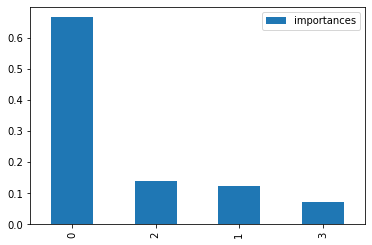

In [ ]:

#################################3#


gp_price = diamonds.iloc[:,[7,-1]]

#labels

from sklearn.preprocessing import LabelEncoder


for i in range(2,5):
    encoder=LabelEncoder()
    diamonds.iloc[:,[i]]=encoder.fit_transform(diamonds.iloc[:,[i]])


X = diamonds.loc[:,['y','clarity','carat','color']]
#X=X.drop(['price'], axis=1)
Y=diamonds.iloc[:,[-1]]



from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10,random_state=0)

from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,Y_train)

pred=clf.predict(X_test)


from sklearn.metrics import classification_report

print(classification_report(Y_test,pred))

importances=pd.DataFrame({'features':X_train.columns,'importances':clf.feature_importances_})
importances=importances.sort_values('importances',ascending=False)

importances.plot.bar()

##############Indentificando padroes no todo

mean_groups_price = diamonds.groupby('grupos').mean()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_fited_Scaled=StandardScaler().fit_transform(diamonds.iloc[:,1:-1].drop(columns=['ones','price','price/carat']))
X_fited_Scaled



k2=KMeans(n_clusters=5)
k2.fit(X_fited_Scaled)

classes_k2=k2.labels_
  

Y_2=diamonds['price']
X=diamonds.iloc[:,1:-1].drop(columns=['ones','price','price/carat'])
X['grupo2']=classes_k2
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X,Y_2,test_size=0.15,random_state=0)


#########################################
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=8, random_state=0)
regr.fit(X_train2, Y_train2)
pred2=regr.predict(X_test2)
#clf2=tree.DecisionTreeRegressor(random_state=0)
#clf2.fit(X_train2,Y_train2)
#pred2=clf2.predict(X_test2)
##########################################

diferencas = pd.DataFrame(abs(pred2 - Y_test2))

diferencas['ones']=1

ImpReg=pd.DataFrame({'importanciaReg':regr.feature_importances_,'variaveis':X_train2.columns})
ImpReg


k3=KMeans(n_clusters=3)
k3.fit(diferencas)
classes_k3=k3.labels_
diferencas['grupos3']=classes_k3

diferencas

,price,ones,grupos3
10176,24.000,1,0
16083,1161.375,1,2
13420,280.375,1,0
20407,2059.750,1,1
8909,652.500,1,2
...,...,...,...
31024,4.125,1,0
48071,30.625,1,0
53073,133.375,1,0
23367,11.250,1,0


Lapidando o modelo



In [ ]:
"""
WCSS=[]
for i in range(1,15):
  k3=KMeans(n_clusters=i)
  k3.fit(diferencas)
  WCSS.append(k3.inertia_)
  #classes_k3=k3.labels_
WCSS=pd.DataFrame(WCSS)
WCSS.plot()
"""

'\nWCSS=[]\nfor i in range(1,15):\n  k3=KMeans(n_clusters=i)\n  k3.fit(diferencas)\n  WCSS.append(k3.inertia_)\n  #classes_k3=k3.labels_\nWCSS=pd.DataFrame(WCSS)\nWCSS.plot()\n'

In [ ]:
diferencas.groupby(['grupos3']).count()['price']

grupos3
0    6717
1     198
2    1176
Name: price, dtype: int64

In [ ]:
def JuntaRuins(qts,diferencas):
  means=[]
  min_index = qts.idxmin()
  Error_Data_Set = diferencas[diferencas['grupos3']!=min_index]
  return Error_Data_Set

bad_data=JuntaRuins(diferencas.groupby(['grupos3']).mean()['price'],diferencas)
bad_data=bad_data.rename(columns={'price':'diff'})

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test2,pred2)

0.9806717570185343

In [ ]:
tot_dataSet_error=diamonds.merge(bad_data,right_index=True,left_index=True,how='outer')
tot_dataSet_error.dropna(inplace=True)

In [ ]:
tot_dataSet_error.drop(columns=['Unnamed: 0','ones_x','ones_y'],inplace=True)

In [ ]:
tot_dataSet_error['volume']=tot_dataSet_error['x']*tot_dataSet_error['y']*tot_dataSet_error['z']
tot_dataSet_error.rename(columns={'grupos3':'gp_diff','grupos':'gp_caracts'})

,carat,cut,color,clarity,depth,table,price,x,y,z,gp_caracts,diff,gp_diff,volume
173,0.60,2,1,4,61.7,55.0,2774,5.41,5.44,3.35,3,518.875,2.0,98.591840
241,1.01,0,1,0,64.5,58.0,2788,6.29,6.21,4.03,3,654.750,2.0,157.415427
287,0.81,4,1,2,60.3,60.0,2797,6.07,6.10,3.67,3,704.250,2.0,135.889090
376,1.20,0,2,0,64.6,56.0,2809,6.73,6.66,4.33,3,863.000,2.0,194.078394
542,1.01,3,4,3,61.6,61.0,2828,6.39,6.31,3.91,3,860.375,2.0,157.654719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53456,0.48,4,0,1,60.6,55.0,2677,5.08,5.12,3.09,3,504.875,2.0,80.369664
53460,0.92,1,3,3,63.8,57.0,2677,6.19,6.13,3.93,3,584.000,2.0,149.122671
53605,0.70,2,2,7,61.9,55.0,2701,5.72,5.68,3.53,3,602.750,2.0,114.688288
53671,0.71,2,1,5,61.7,56.0,2709,5.73,5.75,3.54,3,555.500,2.0,116.634150


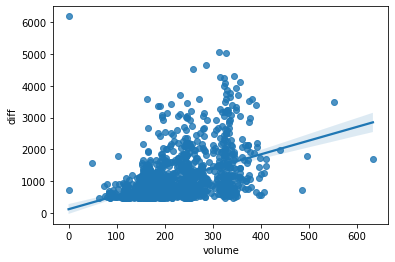

In [ ]:
ax = sns.regplot(x="volume", y="diff", data=tot_dataSet_error)